# Signal Processing Exercises

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

## Exercise

Generate a 10-second random signal with 0.01-second sampling interval and plot it. (Tip: you should use [`np.random.random()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html))

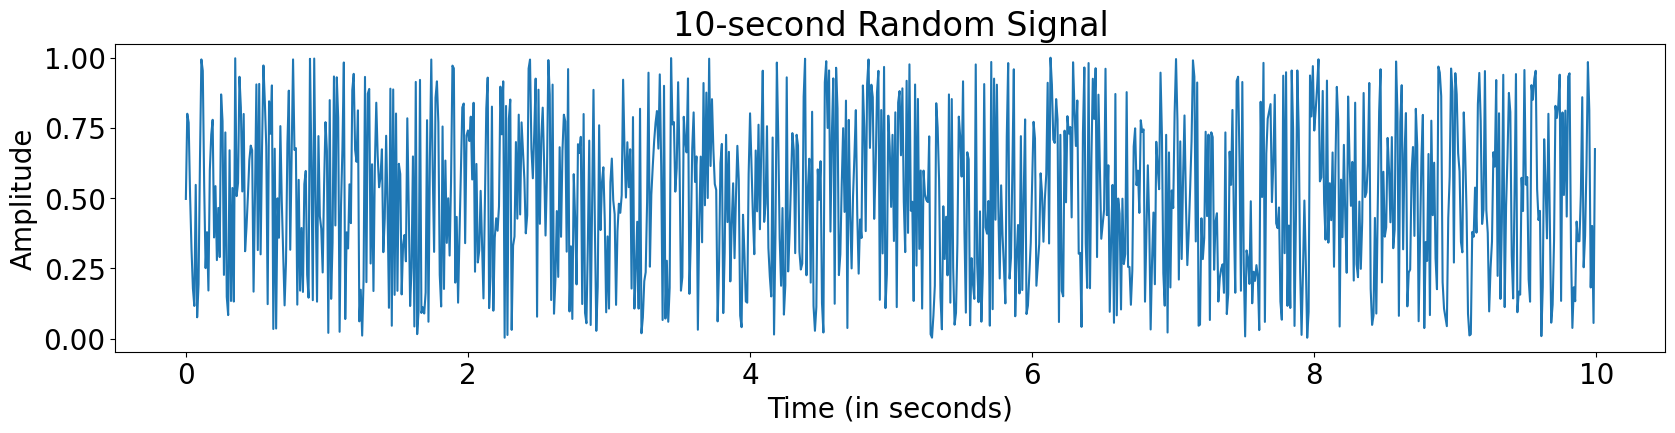

In [21]:
# YOUR CODE HERE
sampling_interval = 0.01
n_sec = 10
n_points = int(n_sec / sampling_interval)
t = np.arange(0, n_sec, sampling_interval)
random_signal = np.random.random(n_points)

plt.figure(figsize=(20,4))
plt.plot(t, random_signal)
plt.title('10-second Random Signal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.show()


**Question**

Is the signal continuous or discrete? Analog or digital?

> Answer: The signal generated is discrete and digital.

## ECG Example
The file `ecg.txt` contains 15,000 electrocardiogram data points, sampled at 1,000 Hz. Plot the signal with the appropriate time axis.

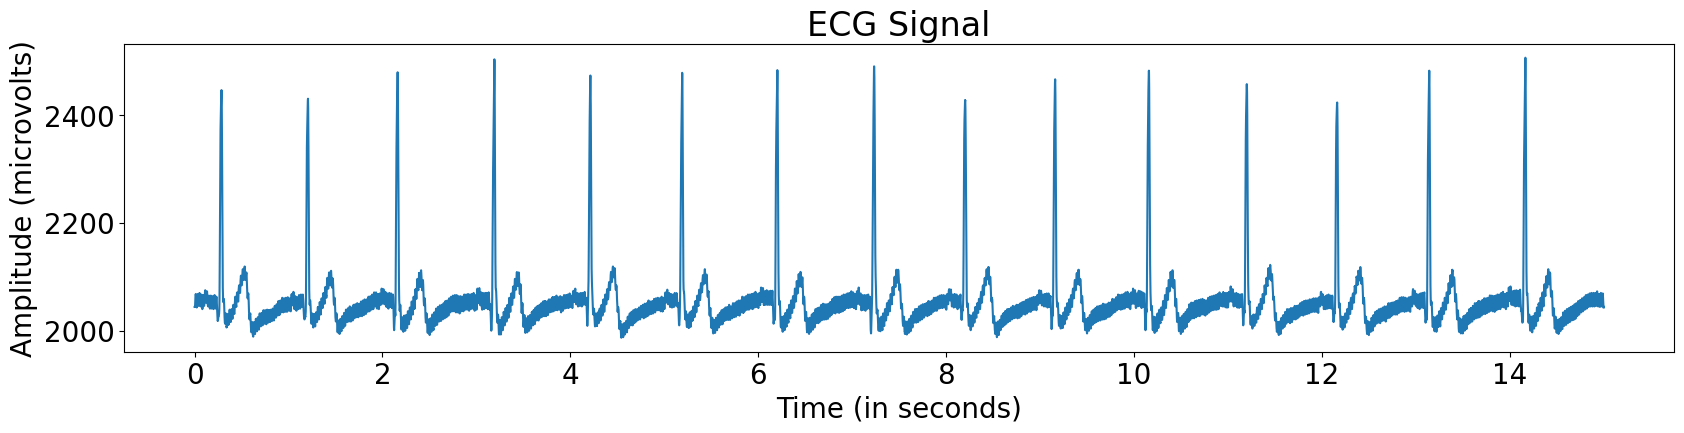

In [22]:
# Load the ECG example data
ecg_url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/ecg.txt'
ecg_microvolts = np.loadtxt(ecg_url, skiprows=4)

# YOUR CODE HERE
sample_rate = 1000  # Hz
n_points = len(ecg_microvolts)
t = np.arange(0, n_points / sample_rate, 1 / sample_rate)

plt.figure(figsize=(20, 4))
plt.plot(t, ecg_microvolts)
plt.title('ECG Signal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude (microvolts)')
plt.show()

**Question**

Estimate the frequency and amplitude of the above ECG signal—NOT using code!

> Answer: 

### Exercise #1

Generate and plot a sinusoidal signal with frequency 0.2 HZ and amplitude of 1.5.

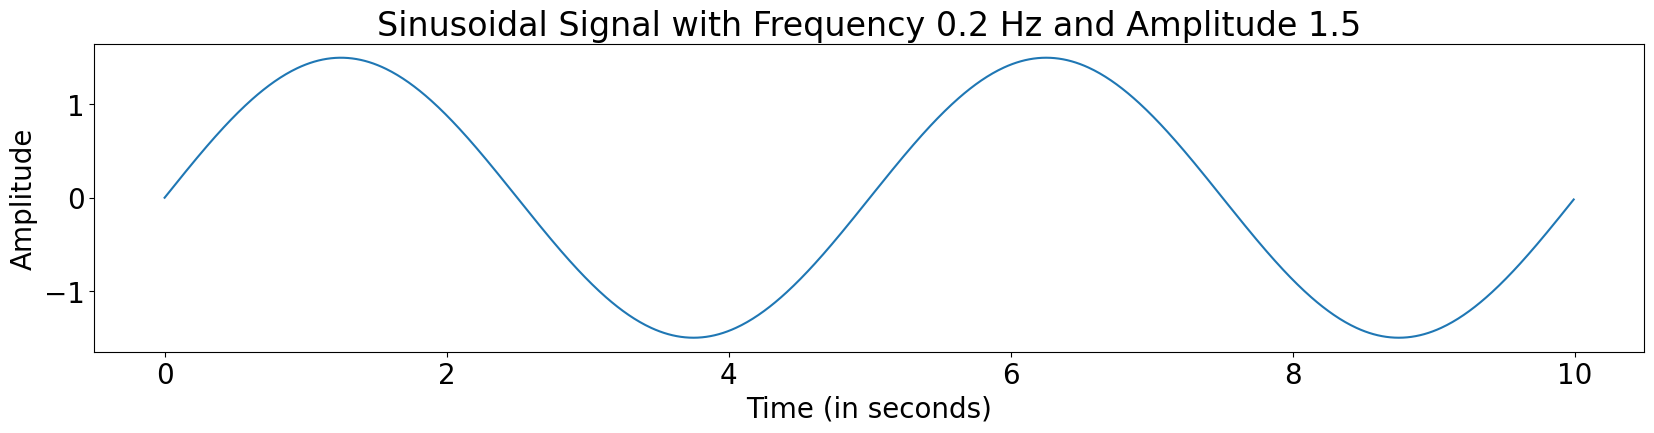

In [23]:
# YOUR CODE HERE
frequency = 0.2  # Hz
amplitude = 1.5
duration = 10  # seconds
sampling_interval = 0.01  # seconds
t = np.arange(0, duration, sampling_interval)

sinusoidal_signal = amplitude * np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(20, 4))
plt.plot(t, sinusoidal_signal)
plt.title('Sinusoidal Signal with Frequency 0.2 Hz and Amplitude 1.5')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.show()


### Exercise #2

Consider the signal shown below (the sum of two sinusoids) for this question. How many points do you need in your subsample to completely determine the signal? What frequencies do you have in your signal?

(-2.0, 2.0)

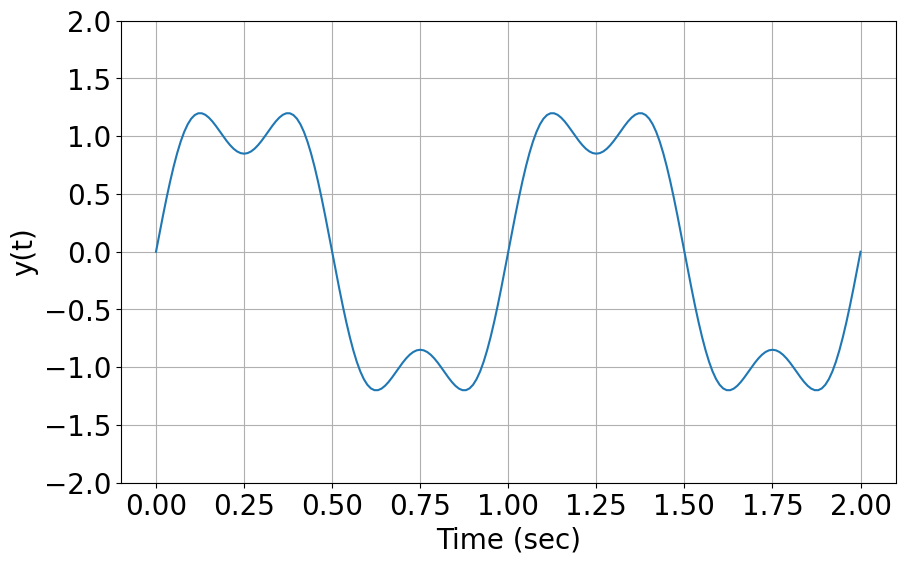

In [24]:
t = np.linspace(0,2,201)
y = (4/np.pi)*np.sin(2*np.pi*t) + (4/(3*np.pi))*np.sin(6*np.pi*t)

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

> Answer: We need 12 points. 

### Exercise #3

Plot the peaks from the ECG signal. You can take a look at `scipy.signal`'s documentation for [`find_peaks()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html).

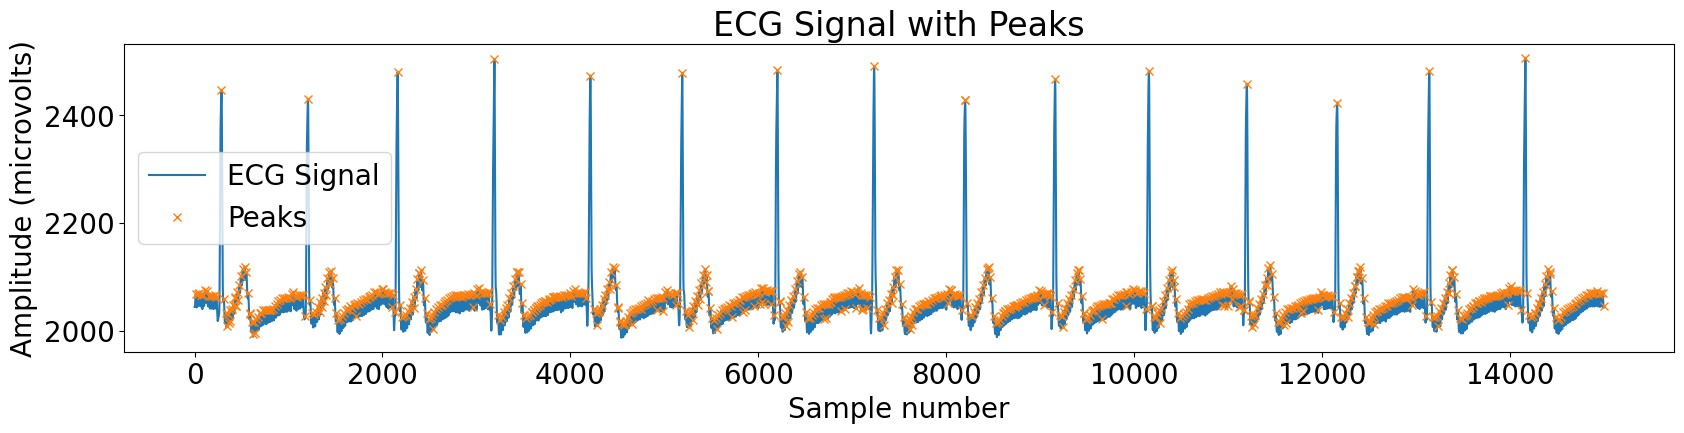

In [25]:
ecg_url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/ecg.txt'
ecg_microvolts = np.loadtxt(ecg_url, skiprows=4)

from scipy.signal import find_peaks

peaks, _ = find_peaks(ecg_microvolts, height=0.5)

plt.figure(figsize=(20, 4))
plt.plot(ecg_microvolts, label='ECG Signal')
plt.plot(peaks, ecg_microvolts[peaks], "x", label='Peaks')
plt.title('ECG Signal with Peaks')
plt.xlabel('Sample number')
plt.ylabel('Amplitude (microvolts)')
plt.legend()
plt.show()

### Exercise #4

1. Generate 5 sine waves with frequencies and amplitudes set based on 2 user-defined lists, then sum them into one signal.
2. Plot the 5 original sine waves and the combined signal.
3. Plot **x** markers at the peaks of the waves using `find_peaks`.

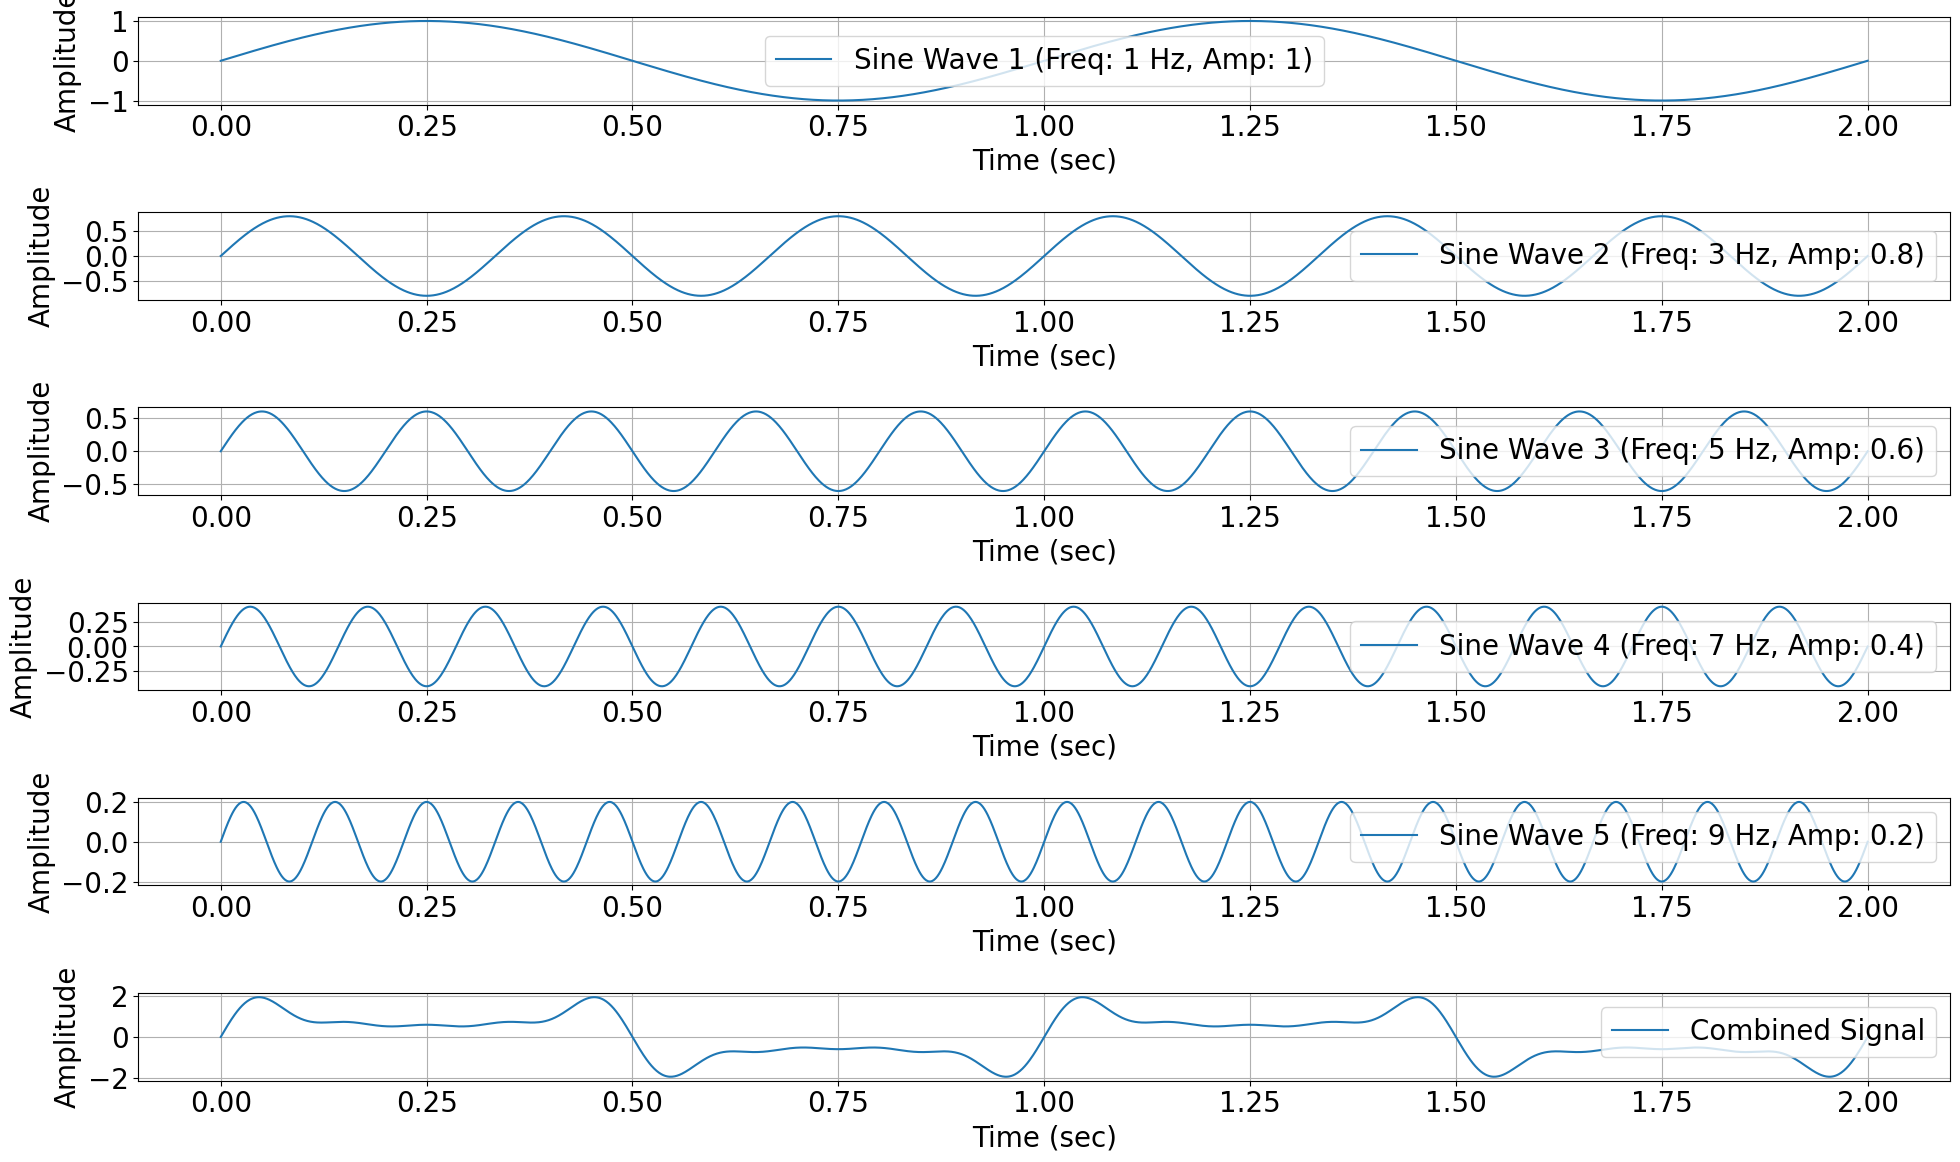

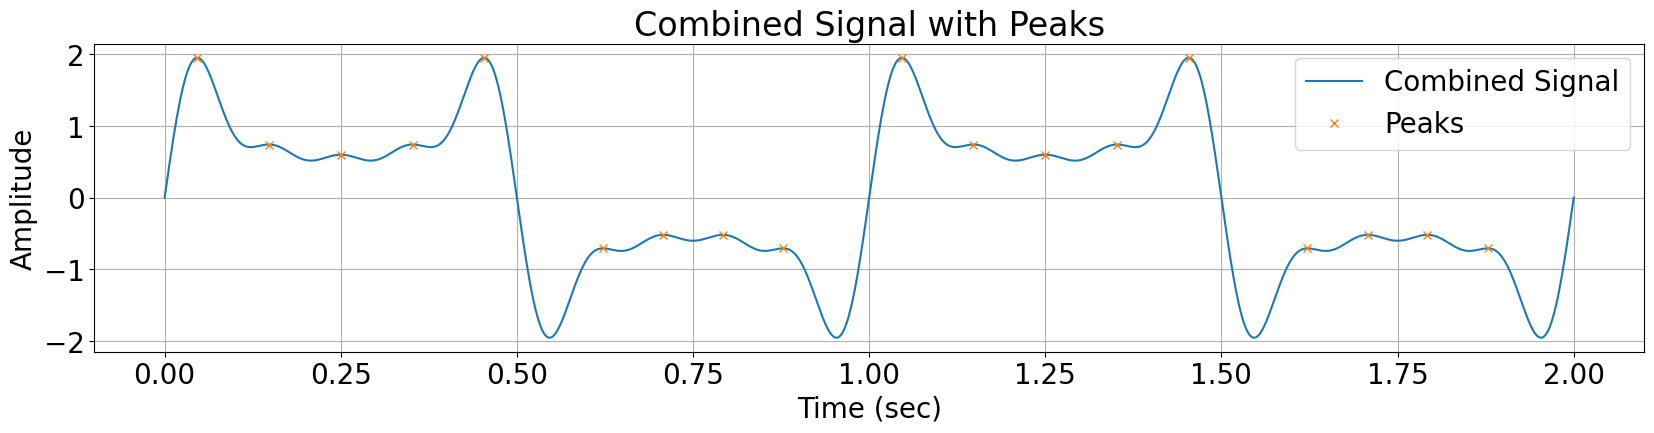

In [26]:
from scipy.signal import find_peaks

frequencies = [1, 3, 5, 7, 9]
amplitudes = [1, 0.8, 0.6, 0.4, 0.2]

duration = 2
sampling_rate = 1000
t = np.linspace(0, duration, duration * sampling_rate)

sine_waves = []
combined_signal = np.zeros_like(t)

for freq, amp in zip(frequencies, amplitudes):
    sine_wave = amp * np.sin(2 * np.pi * freq * t)
    sine_waves.append(sine_wave)
    combined_signal += sine_wave

plt.figure(figsize=(20, 12))
for i, sine_wave in enumerate(sine_waves):
    plt.subplot(6, 1, i + 1)
    plt.plot(t, sine_wave, label=f'Sine Wave {i + 1} (Freq: {frequencies[i]} Hz, Amp: {amplitudes[i]})')
    plt.xlabel('Time (sec)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()

plt.subplot(6, 1, 6)
plt.plot(t, combined_signal, label='Combined Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

peaks, _ = find_peaks(combined_signal)

plt.figure(figsize=(20, 4))
plt.plot(t, combined_signal, label='Combined Signal')
plt.plot(t[peaks], combined_signal[peaks], "x", label='Peaks')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Combined Signal with Peaks')
plt.legend()
plt.grid()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2703ed7-f8b4-40f5-8dd1-77fe823e4d60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>